<a href="https://colab.research.google.com/github/paulf35/cd-ds-productsalespredictions/blob/main/CD_Paul_Foy_Core_ProductSalesPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
Author: Paul Foy


## Project Overview
Your task is to use Pandas to load in the data and start exploring and cleaning it. As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

- Download the data using this link: download the data. (Note: Original data source).
- Insert code below the heading "Loading Data"
  - Use Pandas to read the sales prediction data set into Google Colab.
  - Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
  - Explore the data - what do you need to do to clean this data? Clean it!

Be sure to address each of the following tasks:

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).




## Load and Inspect Data

Load in required packages and import sales data from Google Drive

In [151]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Sales data in from Google Drive
fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df_psales = pd.read_csv(fname)

Provide summary of data using .info() and .head() methods.

In [152]:
# Preview first 5 rows of data
df_psales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [153]:
# Get info data for data set
df_psales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data
Explore the existing data and begin cleaning.

### Q1: How many rows and columns are there?

- There are 8523 rows and 12 columns.

In [154]:
## Display the number of rows and columns for the dataframe
df_psales.shape

(8523, 12)

In [155]:
## Display the number of rows and columns for the dataframe
## Using a print() and an F-string:
## 'There are x rows, and x columns.'
print(f'There are {df_psales.shape[0]} rows and {df_psales.shape[1]} columns.')

There are 8523 rows and 12 columns.


###Q2: What are the data types for each variable


In [156]:
# Use Dtypes to display the data type of each variable/column
# Display the column names and datatypes for each column
# Columns with mixed datatypes are identified as an object datatype
print(df_psales.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [157]:
## Display the descriptive statistics for the numerical columns
## Using include="number"
df_psales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


###Q3: Are there any duplicates? If so, drop any duplicates
- There are no duplicated rows in the original data set.

In [158]:
#Run Duplicated()
df_psales.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [159]:
## Display the number of duplicate rows in the dataset
print(f'There are {df_psales.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### Q3: Are their missing values in the original data set?
- Yes. Item_Wight and Outlet_size columns both had missing values. I replaced numeric missing values with the value -1. I also replaced the missing object values with the string "MISSING".


In [160]:
# Get the number of null values for all columns and save as a variable
df_psales_null = df_psales.isna().sum()

# Verify null values in df_psales_null
print(df_psales_null)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [161]:
# Calculate the percentage of null values for each column.
print(df_psales_null/ len(df_psales) * 100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


Find and replace missing data with placeholder values.

In [162]:
# Find and replace missing numeric values with placeholer value (-1)
num_placeholder = -1
df_psales['Item_Weight'].fillna(value=num_placeholder, inplace=True)

# Find and replace missing object values with placeholer value ('MISSING')
obj_placeholder = 'MISSING'
df_psales['Outlet_Size'].fillna(value=obj_placeholder, inplace=True)

# Confirm no more nulls using Pandas
# Display the total number of missing values
print(f'There are {df_psales.isna().sum().sum()} missing values.')

There are 0 missing values.


### Q7: Are there inconsistent cateogories of data. If so, fix them.
Inconsistencies found and fixed:
- Item_Fat_Content
  - "LF" and "low fat" changed to "Low Fat"
  - "reg" changed to "Regular"
- Outlet_Size
  - "High" changed to "Large"

In [163]:
for col in df_psales:
  print(f'Count for {col} is: \n{df_psales[col].value_counts()}\n')

Count for Item_Identifier is: 
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Count for Item_Weight is: 
-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64

Count for Item_Fat_Content is: 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Count for Item_Visibility is: 
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

Count for Item_Type is: 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods  

In [164]:
# Fix inconsistencies in Item_Fat_Content
#Display the value counts from the column
df_psales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [165]:
# Use a Dictionary to replace values
df_psales.replace({'low fat': 'Low Fat', 'reg':'Regular','LF':'Low Fat', 'High':'Large'}, inplace = True)

In [166]:
#Display the value counts from the column
print(df_psales['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [167]:
#Display the value counts from Outlet_Size
print(df_psales['Outlet_Size'].value_counts())

Medium     2793
MISSING    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64


###Q8: For all numerical columns, list the summary statistics for each one.

In [168]:
# Save a list of object columns (Hint: select_dtypes)
num_cols = df_psales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [169]:
# Check the nunique for just the object cols
df_psales[num_cols].nunique()

Item_Weight                   416
Item_Visibility              7880
Item_MRP                     5938
Outlet_Establishment_Year       9
Item_Outlet_Sales            3493
dtype: int64

Display a summary for all numerical columns in the data set:

In [170]:
# loop through the list of pbject columns
# print the value counts for the column
# Print an empty line for readability

for col in num_cols:
  print(f'Summary for {col} is: \n{df_psales[col].describe()}\n')

Summary for Item_Weight is: 
count    8523.000000
mean       10.478936
std         6.720742
min        -1.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

Summary for Item_Visibility is: 
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

Summary for Item_MRP is: 
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

Summary for Outlet_Establishment_Year is: 
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

Summary for Item_Outlet_Sales is: 
count  

## Exploratory Data Analysis
In this section, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

- Histograms to view the distributions of numerical features in your dataset.
- Boxplots to view statistical summaries of numerical features in your dataset.
- Countplots to view the frequency of each class of categorial features in your dataset.
- Heatmap to view the correlation between features.

### Numberical Columns

In [171]:
## Display the descriptive statistics for the numeric columns
df_psales.describe(exclude=('object'))

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Distribution of item weight and item visibility values

**Distribution of "Item Visibility"**


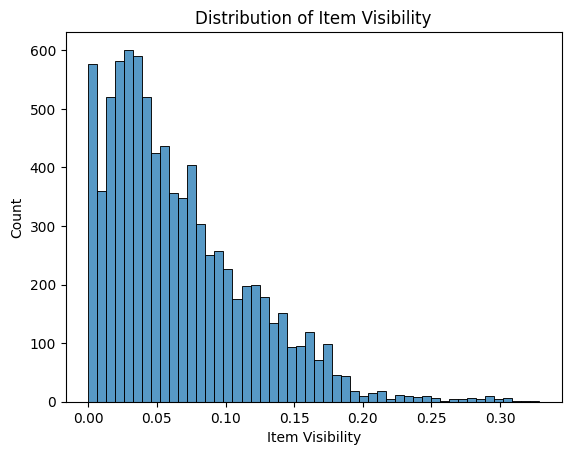

In [172]:
# Create historgram for Item_Visibility
ax = sns.histplot(data=df_psales, x='Item_Visibility')

# Adding titles and labels
ax.set_title('Distribution of Item Visibility')
ax.set_xlabel('Item Visibility')
ax.set_ylabel('Count');

**Distribution of Item Visibility as a boxplot**

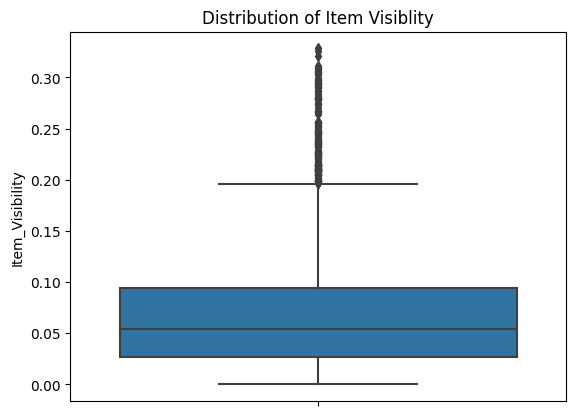

In [173]:
# Create boxplot of visibility
ax = sns.boxplot(data = df_psales, y = 'Item_Visibility')

## Set the Title
ax.set_title('Distribution of Item Visiblity');

Findings:
- Item visibility data is concentrated between 0 and .1.
- The data is right-skewed.

**Distribution of item weight**


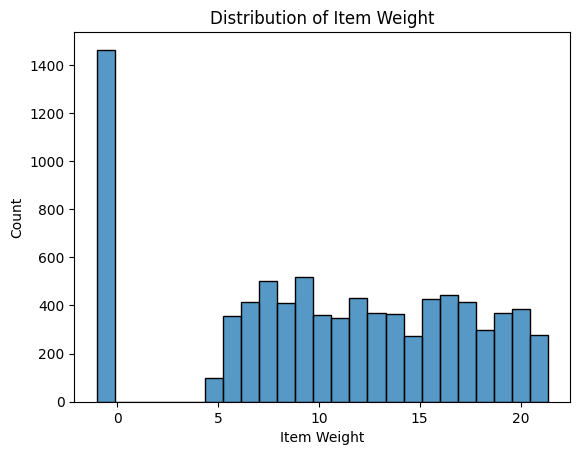

In [174]:
# Create historgram for 'Item_Weight'
ax = sns.histplot(data=df_psales, x='Item_Weight')

## Set the Title
ax.set_title('Distribution of Item Weight')
## Set the X axis label
ax.set_xlabel('Item Weight')
## Set the Y axis label
ax.set_ylabel('Count');



**Distribution of Item Weight as a boxplot**


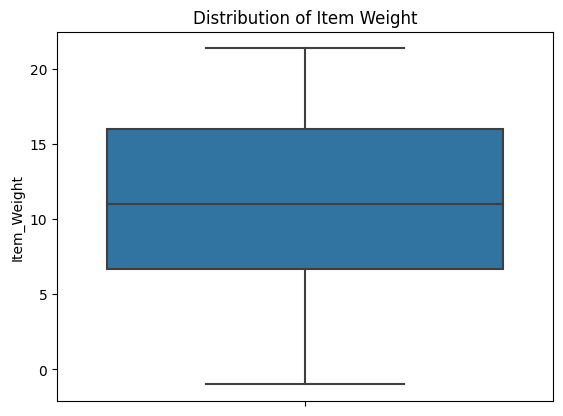

In [175]:
# Create boxplot of item weight
ax = sns.boxplot(data = df_psales, y = 'Item_Weight')

## Set the Title
ax.set_title('Distribution of Item Weight');

**Findings:**
- Item weight is left-skewed
- For item weights greater than 5, the items are pretty evenly distributed.

Get counts for each item type

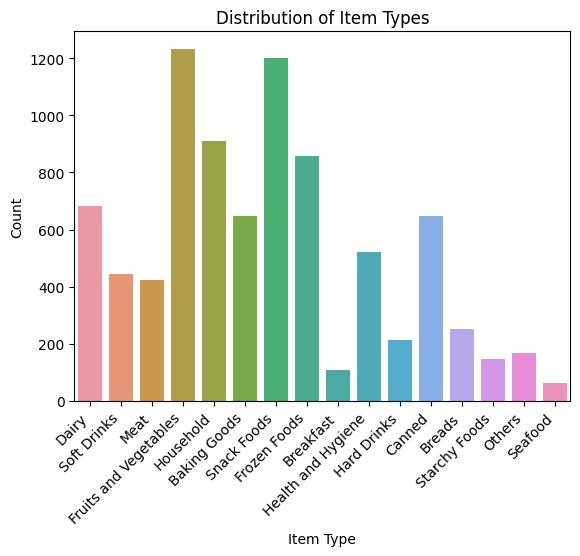

In [176]:
ax = sns.countplot(data=df_psales, x='Item_Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
## Set the Title
ax.set_title('Distribution of Item Types')
## Set the X axis label
ax.set_xlabel('Item Type')
## Set the Y axis label
ax.set_ylabel('Count');

Findings:
- Fruits and Vegetables has the higest count
- Seafood has the lowest count

**Compare item weight summarizations across all item types**




[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

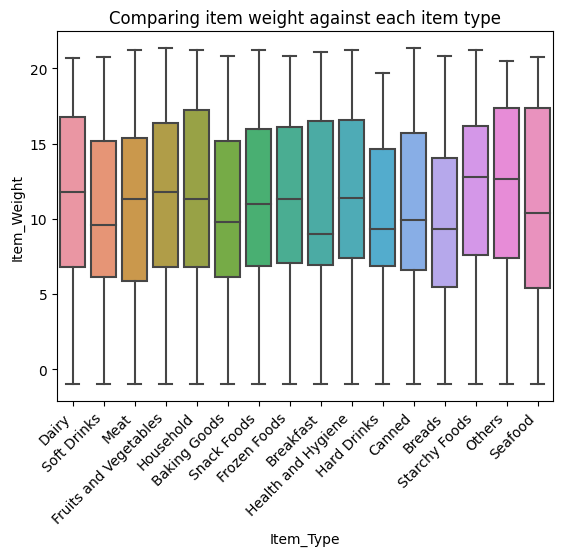

In [177]:
# Comparing item weight summaries for each item type
ax = sns.boxplot(data=df_psales, x='Item_Type', y="Item_Weight")
ax.set_title("Comparing item weight against each item type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

**Findings:**
- Average weights across items types are similar

##Correlation Data


In [178]:
# Get correlations
corr = df_psales.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


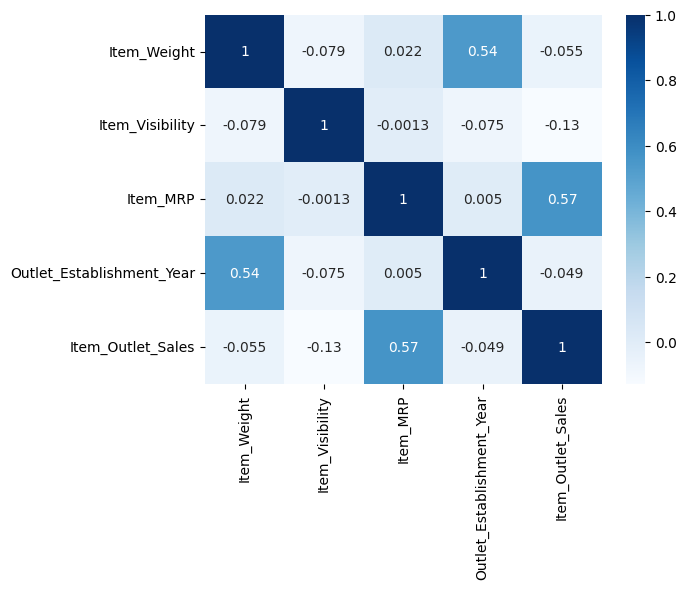

In [179]:
# Make a heatmap of the correlations
sns.heatmap(corr, cmap = 'Blues', annot=True);

**Findings:**
- There are no strong correlations between any of the numerical values.
- The strongest positive correlation is between Item_MRP and Item_Outlet_Sales at .57
- There are no negative correlations.

## Explanatory Data Analysis